In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Regression_StoreSales.csv')

In [3]:
df.shape

(14204, 12)

In [4]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
id_pred=df[df['Item_Outlet_Sales'].isna()].index

In [227]:
df_w=df.drop(id_pred,axis=0)

In [232]:
df_w

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exporting for multi Variate Analysis Using Tableau. 

In [295]:
df_w.to_excel('TestData.xlsx',index=False)

In [235]:
df_w.select_dtypes(include=object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# EDA

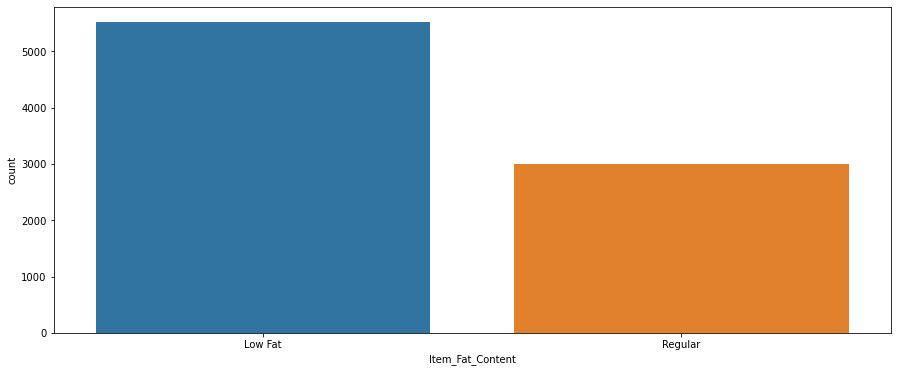

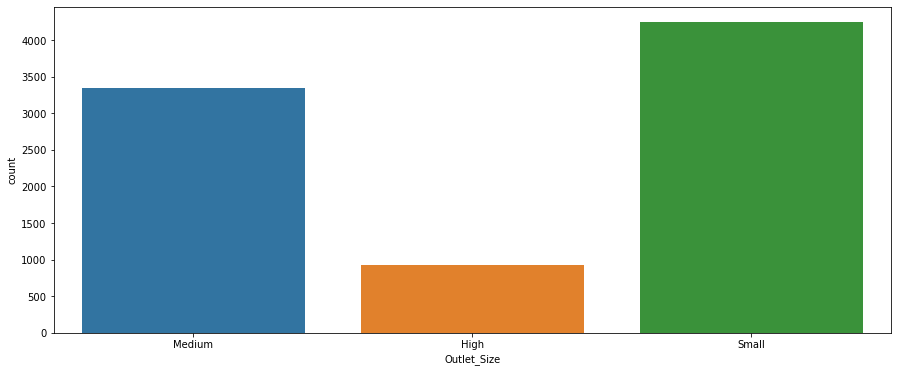

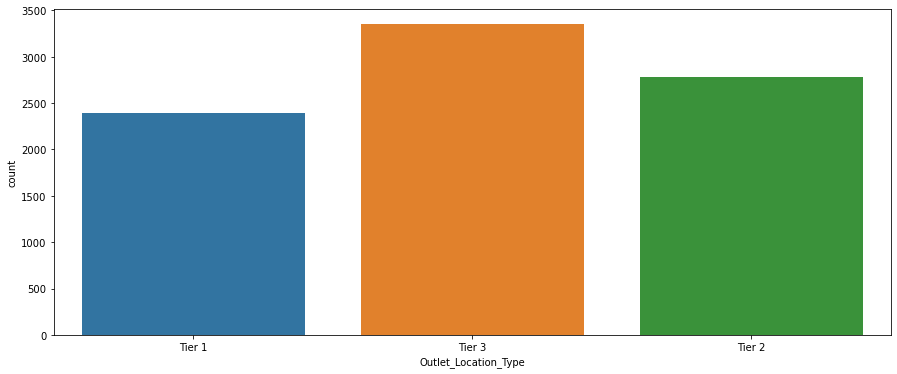

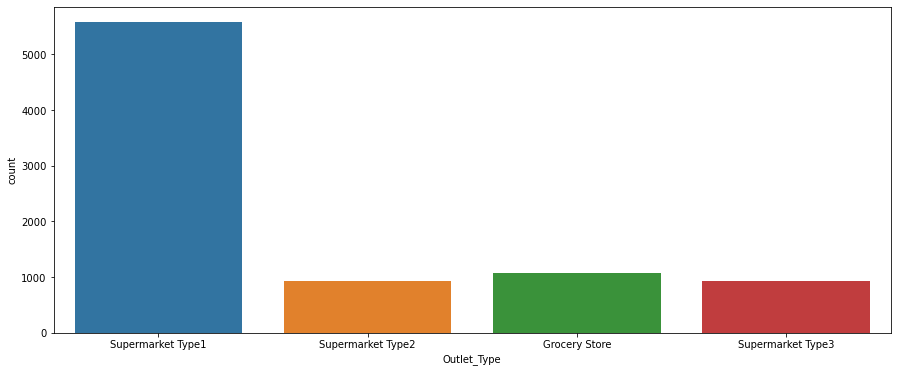

In [241]:
for col in ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col, data=df_w)
    plt.show()
    

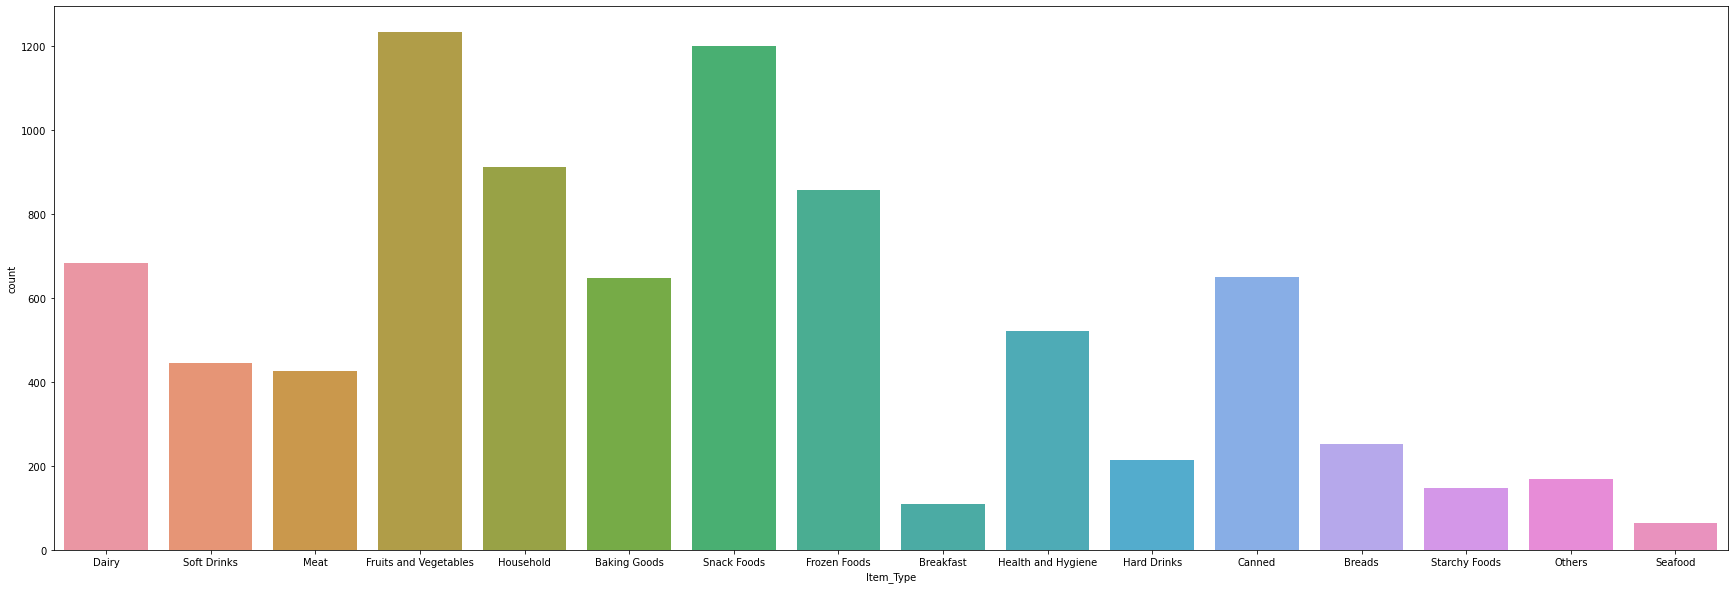

In [243]:
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type', data=df_w)
plt.show()

In [238]:
df_w.select_dtypes(exclude=object).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


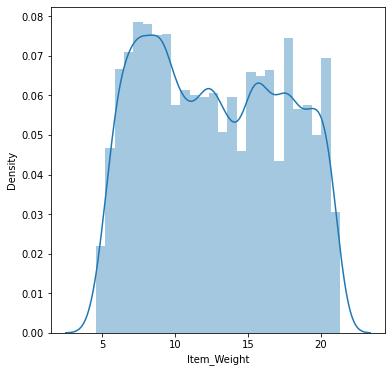

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


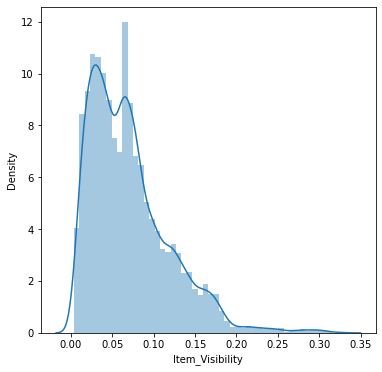

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


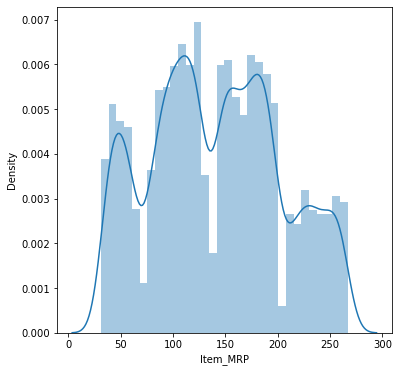

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


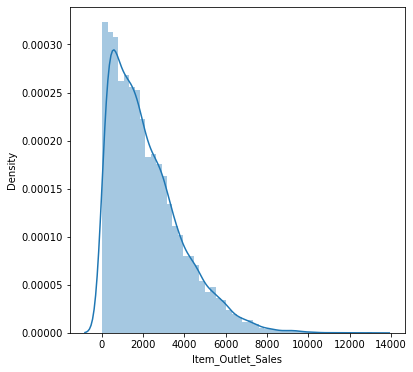

In [240]:

for col in ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

# Conclusion
- FMCG products are bringing the highest sales.
- Supermarket Type 1 stores which are of small and medium size are attracting more people.

In [11]:
df_w.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1]:
from pandas_profiling import ProfileReport

TypeError: dataclass_transform() got an unexpected keyword argument 'field_specifiers'

In [226]:
profile=ProfileReport(df,title='Profile Report')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df_w.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


In [275]:
df_forecast=df.iloc[id_pred,:]

In [14]:
encoder=preprocessing.LabelEncoder()
for col in df_w.select_dtypes(include=object):
    df_w[col]=encoder.fit_transform(df_w[col])

In [16]:
scaler=preprocessing.MinMaxScaler()
df_ws=pd.DataFrame(scaler.fit_transform(df_w),columns=df_w.columns)

f_w=df_ws.drop('Item_Outlet_Sales',axis=1)

t_w=df_ws[['Item_Outlet_Sales']]

# Feature Selection

C:\Users\hp\AppData\Local\Temp\ipykernel_10668\2812531061.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(f_w,t_w)


<BarContainer object of 11 artists>

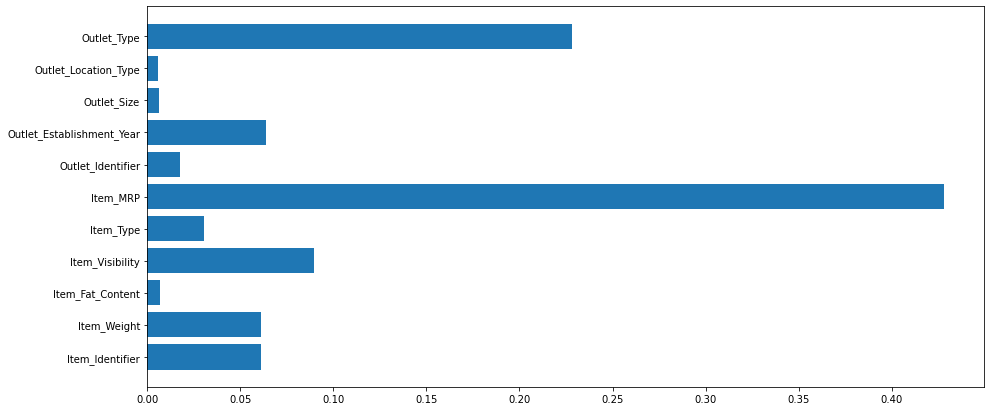

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(f_w,t_w)

plt.figure(figsize=(15,7))
plt.barh(f_w.columns,rf.feature_importances_)

<AxesSubplot:>

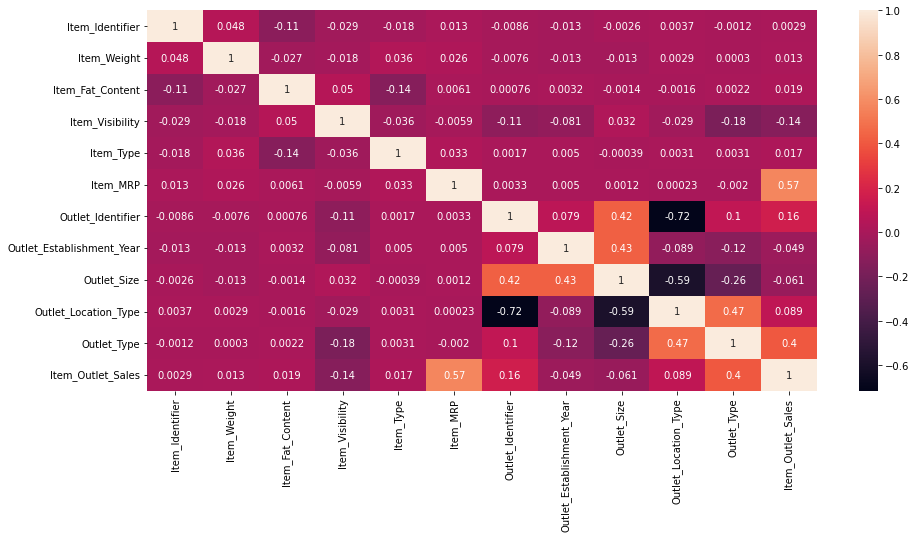

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(df_ws.corr(),annot=True)

# Dropping 
- Item Identifier
- Outlet_identifier
- Outlet_establishment_Year
- Outlet_Size

**As they logically don't add much value to Outlet_Sales.**

In [20]:
df_m=df_w.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',],axis=1)

In [21]:
df_m

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,0,1,2097.2700
3,19.200,1,0.074402,6,182.0950,2,0,732.3800
4,8.930,0,0.064299,9,53.8614,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2,2,1845.5976


In [26]:
df_m.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
df_ms=pd.DataFrame(scaler.fit_transform(df_m),columns=df_m.columns)

In [29]:
df_ms

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.163812,0.866667,0.777729,1.0,0.333333,0.210293
8519,0.227746,1.0,0.133638,0.000000,0.326263,0.5,0.333333,0.039529
8520,0.359929,0.0,0.097321,0.533333,0.228492,0.5,0.333333,0.088850
8521,0.158083,1.0,0.436080,0.866667,0.304939,1.0,0.666667,0.138835


In [30]:
dep=df_ms[['Item_Outlet_Sales']]
ind=df_ms.drop('Item_Outlet_Sales',axis=1)

In [31]:
print(dep.shape,ind.shape)

(8523, 1) (8523, 7)


In [44]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict,cross_val_score

# SVR

In [62]:
from sklearn.svm import SVR
svr_model=SVR()


svr_r2=cross_val_score(svr_model,ind,dep,cv=6,scoring='r2').mean()
svr_rmse=cross_val_score(svr_model,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'SVR R2_score: {svr_r2}',f'SVR rmse: {svr_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

SVR R2_score: 0.5522169463551768
SVR rmse: -0.08741252936905657


# Decision Tree Regressor

In [77]:
for md in range(2,20):
        dtr_r2=cross_val_score(DecisionTreeRegressor(max_depth=md,random_state=42),ind,dep,cv=6,scoring='r2').mean()
        dtr_rmse=cross_val_score(DecisionTreeRegressor(max_depth=md,random_state=42),ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
        print(f'Max depth {md} Average r2 ',dtr_r2)
        print(f'Max depth {md} Average rmse ',dtr_rmse)
        print('=====================================================================')
        print('\n')

Max depth 2 Average r2  0.4311728538105561
Max depth 2 Average rmse  -0.09854286671176248


Max depth 3 Average r2  0.5223803833990243
Max depth 3 Average rmse  -0.09030286011036319


Max depth 4 Average r2  0.575830028352743
Max depth 4 Average rmse  -0.0850735443558351


Max depth 5 Average r2  0.5902740792035
Max depth 5 Average rmse  -0.08360934377356921


Max depth 6 Average r2  0.5853769470316538
Max depth 6 Average rmse  -0.08407204217547132


Max depth 7 Average r2  0.5791687680708186
Max depth 7 Average rmse  -0.08470858080929768


Max depth 8 Average r2  0.5651103401687854
Max depth 8 Average rmse  -0.08610467999149081


Max depth 9 Average r2  0.5447543456641507
Max depth 9 Average rmse  -0.08810381554115622


Max depth 10 Average r2  0.5194213976010748
Max depth 10 Average rmse  -0.09051047196519363


Max depth 11 Average r2  0.4887127648428626
Max depth 11 Average rmse  -0.09332132018764494


Max depth 12 Average r2  0.45823578017662253
Max depth 12 Average rmse  -0.096104

# Best Parameter for Decision Tree is maxdepth=5

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr_model=DecisionTreeRegressor(max_depth=5)


dtr_r2=cross_val_score(dtr_model,ind,dep,cv=6,scoring='r2').mean()
dtr_rmse=cross_val_score(dtr_model,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'DecisionTreeRegressor R2_score: {dtr_r2}',f'DecisionTreeRegressor rmse: {dtr_rmse}',sep='\n')

DecisionTreeRegressor R2_score: 0.5902740792034998
DecisionTreeRegressor rmse: -0.08360934377356921


# RandomForestRegressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_model=RandomForestRegressor(oob_score=True)

para={'max_depth':[5,8,12],'criterion':["squared_error", "absolute_error", "poisson"],'n_estimators':[5,10,25,50,100]}
grid = GridSearchCV(estimator=rf_model, param_grid=para, cv=6, scoring='neg_root_mean_squared_error')
grid.fit(ind,np.array(dep).ravel())

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too fe

GridSearchCV(cv=6, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(5, 8, 12),
                         'n_estimators': [5, 10, 25, 50, 100]},
             scoring='neg_root_mean_squared_error')

In [107]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True)

In [108]:
rf_b_model=RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True)

rf_r2=cross_val_score(rf_b_model,ind,dep,cv=6,scoring='r2').mean()
rf_rmse=cross_val_score(rf_b_model,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'RandomForestRegressor R2_score: {rf_r2}',f'RandomForestRegressor rmse: {rf_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

RandomForestRegressor R2_score: 0.5960912490892846
RandomForestRegressor rmse: -0.08315435283785852


# Stacking

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor

def stacking():
    base_m=[]
    for i in [('dtr',DecisionTreeRegressor(max_depth=5)),('svm',SVR()),('knr',KNeighborsRegressor())]:
        base_m.append(i)
    meta_m=LinearRegression()
    
    sr_model=StackingRegressor(estimators=base_m,final_estimator=meta_m,cv=6)
    return sr_model

In [115]:
sr_model=stacking()

In [116]:
sr_model

StackingRegressor(cv=6,
                  estimators=[('dtr', DecisionTreeRegressor(max_depth=5)),
                              ('svm', SVR()), ('knr', KNeighborsRegressor())],
                  final_estimator=LinearRegression())

In [117]:
sr_r2=cross_val_score(sr_model,ind,dep,cv=6,scoring='r2').mean()
sr_rmse=cross_val_score(sr_model,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'StackingRegressor R2_score: {sr_r2}',f'StackingRegressor rmse: {sr_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

StackingRegressor R2_score: 0.5919924348986858
StackingRegressor rmse: -0.08343671807193032


In [137]:
pd.DataFrame({'Model':['SVR','DecisionTreeRegressor','RandomForestRegressor','Stacking']
            ,'r2_score':[svr_r2,dtr_r2,rf_r2,sr_r2]
            ,'RMSE':[svr_rmse,dtr_rmse,rf_rmse,sr_rmse]})

,Model,r2_score,RMSE
0,SVR,0.552217,-0.087413
1,DecisionTreeRegressor,0.590274,-0.083609
2,RandomForestRegressor,0.596091,-0.083154
3,Stacking,0.591992,-0.083437


# RandomForestRegressor is performing bestas per the training score and the RMSE 

# Trial Model

In [136]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(max_depth=4, n_estimators=100)

xgb_r2=cross_val_score(xgb_model,ind,dep,cv=6,scoring='r2').mean()
xgb_rmse=cross_val_score(xgb_model,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'XGBRegressor R2_score: {xgb_r2}',f'XGBRegressor rmse: {xgb_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

XGBRegressor R2_score: 0.5590660345859213
XGBRegressor rmse: -0.08671987908616831


# Improving Model

# StackingRegressor 2: XGB Improvement

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

def stacking2():
    base_m2=[]
    for i in [('dtr',DecisionTreeRegressor(max_depth=5)),('svm',SVR()),('knr',KNeighborsRegressor()),('xgb',XGBRegressor(max_depth=4, n_estimators=100))]:
        base_m2.append(i)
    meta_m2=LinearRegression()
    
    sr_model2=StackingRegressor(estimators=base_m2,final_estimator=meta_m2,cv=6)
    return sr_model2

In [245]:
sr_model2=stacking2()

In [246]:
sr_model2

StackingRegressor(cv=6,
                  estimators=[('dtr', DecisionTreeRegressor(max_depth=5)),
                              ('svm', SVR()), ('knr', KNeighborsRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=None, missing=nan,
       

In [247]:
sr2_r2=cross_val_score(sr_model2,ind,dep,cv=6,scoring='r2').mean()
sr2_rmse=cross_val_score(sr_model2,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'StackingRegressor2 R2_score: {sr2_r2}',f'StackingRegressor2 rmse: {sr2_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

StackingRegressor2 R2_score: 0.5921019886166262
StackingRegressor2 rmse: -0.08342287997554476


In [248]:
pd.DataFrame({'Model':['SVR','DecisionTreeRegressor','RandomForestRegressor','Stacking']
            ,'r2_score':[svr_r2,dtr_r2,rf_r2,sr_r2]
            ,'RMSE':[svr_rmse,dtr_rmse,rf_rmse,sr_rmse]})

,Model,r2_score,RMSE
0,SVR,0.552217,-0.087413
1,DecisionTreeRegressor,0.590274,-0.083609
2,RandomForestRegressor,0.596091,-0.083154
3,Stacking,0.591992,-0.083437


# Stacking Regressor 3: SVR improvement

### Finding Best SVR Parameters 

In [251]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear','rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svr_model,
                           param_grid = parameters,
                           scoring = 'neg_root_mean_squared_error',
                           cv = 6)
grid_search.fit(ind, dep)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Best Accuracy: -8.73 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


In [253]:
from sklearn.svm import SVR
svr_model2=SVR(C=1, gamma=0.9)


svr2_r2=cross_val_score(svr_model2,ind,dep,cv=6,scoring='r2').mean()
svr2_rmse=cross_val_score(svr_model2,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'SVR2 R2_score: {svr2_r2}',f'SVR2 rmse: {svr2_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

SVR2 R2_score: 0.5537631445655783
SVR2 rmse: -0.08726361487594098


In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

def stacking3():
    base_m2=[]
    for i in [('dtr',DecisionTreeRegressor(max_depth=5)),('svm',SVR(C=1, gamma=0.9)),('knr',KNeighborsRegressor()),('xgb',XGBRegressor(max_depth=4, n_estimators=100))]:
        base_m2.append(i)
    meta_m2=LinearRegression()
    
    sr_model3=StackingRegressor(estimators=base_m2,final_estimator=meta_m2,cv=6)
    return sr_model3

In [256]:
sr_model3=stacking3()
sr_model3

StackingRegressor(cv=6,
                  estimators=[('dtr', DecisionTreeRegressor(max_depth=5)),
                              ('svm', SVR(C=1, gamma=0.9)),
                              ('knr', KNeighborsRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...rate=None,
                                            max_delta_step=None, max_depth=4,
                                            min_

In [257]:
sr3_r2=cross_val_score(sr_model3,ind,dep,cv=6,scoring='r2').mean()
sr3_rmse=cross_val_score(sr_model3,ind,dep,cv=6,scoring='neg_root_mean_squared_error').mean()
print(f'StackingRegressor3 R2_score: {sr3_r2}',f'StackingRegressor3 rmse: {sr3_rmse}',sep='\n')

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index 

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\hp\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

StackingRegressor3 R2_score: 0.5923781674607995
StackingRegressor3 rmse: -0.08339772330194561


In [258]:
pd.DataFrame({'Model':['SVR','DecisionTreeRegressor','RandomForestRegressor','Stacking_1','Stacking_2','Stacking_3']
            ,'r2_score':[svr_r2,dtr_r2,rf_r2,sr_r2,sr2_r2,sr3_r2]
            ,'RMSE':[svr_rmse,dtr_rmse,rf_rmse,sr_rmse,sr2_rmse,sr3_rmse]})

,Model,r2_score,RMSE
0,SVR,0.552217,-0.087413
1,DecisionTreeRegressor,0.590274,-0.083609
2,RandomForestRegressor,0.596091,-0.083154
3,Stacking_1,0.591992,-0.083437
4,Stacking_2,0.592102,-0.083423
5,Stacking_3,0.592378,-0.083398


# Even after model improvements RandomForestRegressor is Performing Best

In [278]:
df_f_run=df_forecast.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size'],axis=1)

In [279]:
for col in df_f_run.select_dtypes(include=object):
    df_f_run[col]=encoder.fit_transform(df_f_run[col])

In [281]:
df_fs=pd.DataFrame(scaler.fit_transform(df_f_run),columns=df_f_run.columns)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [282]:
df_fs.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [283]:
df_fs.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type
0,0.964275,0.0,0.012415,0.866667,0.323413,0.0,0.333333
1,0.222983,1.0,0.108848,0.266667,0.235849,0.5,0.333333
2,0.598095,0.0,0.299905,0.733333,0.894140,1.0,0.000000


In [284]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,df_m[['Item_Outlet_Sales']],test_size=0.25,random_state=42)

In [285]:
rf_b_model.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_10668\3188957537.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_b_model.fit(x_train,y_train)


RandomForestRegressor(max_depth=5, n_estimators=50, oob_score=True)

In [286]:
y_pred=rf_b_model.predict(x_test)

y_pred

array([1253.77171656,  692.79141611,  692.79141611, ..., 3440.08102325,
       2010.45641289, 2437.26278233])

In [287]:
r2_score(y_test,y_pred)

0.6047313071816667

In [288]:
mean_squared_error(y_test,y_pred,squared=False)

1044.2879612763938

In [289]:
sales_forecasted=rf_b_model.predict(df_fs)

sales_forecasted

array([1602.84172811, 1413.78449914,  561.67626567, ..., 2001.17402876,
       3483.12202461, 1253.77171656])

In [290]:
sales_forecasted=pd.DataFrame(sales_forecasted.reshape(-1,1),columns=['Item_Outlet_Sales'],index=df_f_run.index)

sales_forecasted

,Item_Outlet_Sales
8523,1602.841728
8524,1413.784499
8525,561.676266
8526,2466.299124
8527,6295.877903
...,...
14199,2099.564119
14200,2714.456265
14201,2001.174029
14202,3483.122025


In [291]:
df_forecast.drop('Item_Outlet_Sales',axis=1,inplace=True,)

df_forecast

df_final_forecast=pd.concat([df_forecast,sales_forecasted],axis=1)

df_final_forecast

C:\Users\hp\AppData\Local\Temp\ipykernel_10668\3834312783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast.drop('Item_Outlet_Sales',axis=1,inplace=True,)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1602.841728
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1413.784499
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,561.676266
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2466.299124
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6295.877903
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2099.564119
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2714.456265
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,2001.174029
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3483.122025


# Exporting for performing multivariate analysis on Tableau.

In [294]:
df_final_forecast.to_excel('Forecast.xlsx',index=False)